In [43]:
import pandas as pd
import numpy as np

df_embedding = pd.read_json('../../data/embedded_train.jl', lines=True)
df_embedding.loc[df_embedding['target'] == 'NA', 'target'] = '0'

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_embedding["target"])
df_embedding["target_label"] = df_embedding["target"].apply(lambda x: le.transform([x])[0])

1     984
0     914
-1    601
Name: target, dtype: int64

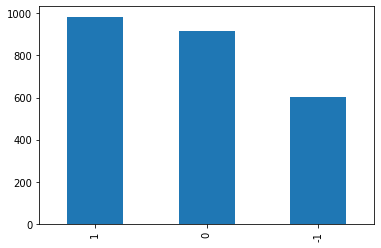

In [45]:
df_embedding["target"].value_counts().plot.bar()
df_embedding["target"].value_counts()

In [46]:
from sklearn.model_selection import train_test_split

X = np.array(df_embedding["embedding"].tolist())
y = np.array(df_embedding['target_label'].to_list())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [47]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [60]:
param = {'max_depth': 50, 'eta': 0.1, 'objective': 'multi:softprob', 'num_class': 3}
param['nthread'] = 8
param['eval_metric'] = 'auc'
evallist = [(dtest, 'eval'), (dtrain, 'train')]

num_round = 1000
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.70832	train-auc:0.99977
[1]	eval-auc:0.71098	train-auc:0.99998
[2]	eval-auc:0.71674	train-auc:0.99999
[3]	eval-auc:0.72261	train-auc:1.00000
[4]	eval-auc:0.72349	train-auc:1.00000
[5]	eval-auc:0.72764	train-auc:1.00000
[6]	eval-auc:0.73736	train-auc:1.00000
[7]	eval-auc:0.73679	train-auc:1.00000
[8]	eval-auc:0.74288	train-auc:1.00000
[9]	eval-auc:0.74390	train-auc:1.00000
[10]	eval-auc:0.74752	train-auc:1.00000
[11]	eval-auc:0.75167	train-auc:1.00000
[12]	eval-auc:0.75510	train-auc:1.00000
[13]	eval-auc:0.75586	train-auc:1.00000
[14]	eval-auc:0.76097	train-auc:1.00000
[15]	eval-auc:0.76458	train-auc:1.00000
[16]	eval-auc:0.76560	train-auc:1.00000
[17]	eval-auc:0.76875	train-auc:1.00000
[18]	eval-auc:0.77115	train-auc:1.00000
[19]	eval-auc:0.77346	train-auc:1.00000
[20]	eval-auc:0.77727	train-auc:1.00000
[21]	eval-auc:0.77936	train-auc:1.00000
[22]	eval-auc:0.78051	train-auc:1.00000
[23]	eval-auc:0.78066	train-auc:1.00000
[24]	eval-auc:0.78120	train-auc:1.00000
[25]	eval-

In [61]:
from sklearn.metrics import classification_report

y_hat = bst.predict(dtest)

y_hat = np.argmax(y_hat, axis=1)
report = classification_report(y_test, y_hat)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.54      0.61       120
           1       0.62      0.70      0.66       183
           2       0.68      0.70      0.69       197

    accuracy                           0.66       500
   macro avg       0.67      0.65      0.65       500
weighted avg       0.66      0.66      0.66       500

